## CHAI CO.data 분석

In [1]:
import pandas as pd
pd.set_option('display.float_format','{:.2f}'.format)
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 그래프 한글폰트 사용
plt.rc('font', family='Malgun Gothic')

In [5]:
# 데이터 불러오기 
chai = pd.read_csv('BA_assesment.csv')

chai.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,9
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,6
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,9
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,4
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,5


In [20]:
# 컬럼 13개 / 로우 5,623,810개
print(chai.shape)
chai.columns

(5623810, 22)


Index(['customer_id', 'created_at', 'pre_discount', 'post_discount',
       'cashback_amount', 'discount_amount', 'total_promotion',
       'push_permission', 'gender', 'is_foreigner', 'birthday', 'sign_up_date',
       'merchant_id', 'created-year', 'created-month', 'created-day',
       'created-hour', 'created-minute', 'birth-year', 'birth-month',
       'birth-day', 'age'],
      dtype='object')

In [23]:
# 컬럼간 상관관계 확인
chai.corr(method='pearson')

,customer_id,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,is_foreigner,merchant_id,created-year,created-month,created-day,created-hour,created-minute,birth-year,birth-month,birth-day,age
customer_id,1.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
pre_discount,0.00,1.00,1.00,0.23,0.61,0.68,-0.02,-0.00,-0.00,-0.03,0.03,0.03,-0.00,0.01,0.00,-0.00,-0.00,-0.00
post_discount,0.00,1.00,1.00,0.24,0.59,0.66,-0.02,-0.00,-0.00,-0.02,0.02,0.03,-0.00,0.01,0.00,-0.00,-0.00,-0.00
cashback_amount,0.00,0.23,0.24,1.00,-0.12,0.18,0.01,0.01,0.00,0.25,-0.22,0.00,0.01,-0.00,0.01,0.00,0.00,-0.01
discount_amount,-0.00,0.61,0.59,-0.12,1.00,0.95,-0.05,-0.02,0.00,-0.26,0.20,0.00,-0.02,0.02,-0.00,-0.00,-0.00,0.00
total_promotion,-0.00,0.68,0.66,0.18,0.95,1.00,-0.04,-0.02,0.00,-0.18,0.13,0.00,-0.01,0.02,-0.00,-0.00,-0.00,0.00
push_permission,0.00,-0.02,-0.02,0.01,-0.05,-0.04,1.00,0.07,0.00,-0.01,0.02,0.00,0.02,-0.01,-0.22,-0.00,-0.00,0.22
is_foreigner,0.00,-0.00,-0.00,0.01,-0.02,-0.02,0.07,1.00,-0.00,0.01,-0.00,0.00,0.00,0.00,0.04,0.01,-0.00,-0.04
merchant_id,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
created-year,0.00,-0.03,-0.02,0.25,-0.26,-0.18,-0.01,0.01,-0.00,1.00,-0.96,-0.02,-0.03,0.00,0.04,0.00,0.00,-0.04


In [3]:
# 컬럼간 다중공선성 확인

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

chai = pd.read_csv('BA_assesment.csv')

X_train = chai[['pre_discount', 'post_discount', 'cashback_amount', 'discount_amount','total_promotion']]

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)


C:\Users\a\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


   VIF_Factor          Feature
0   101004.68     pre_discount
1  2160825.51    post_discount
2         inf  cashback_amount
3         inf  discount_amount
4         inf  total_promotion


###  데이터 살펴보기

In [6]:
# null 값 확인하기
chai.isnull().sum()

customer_id        0
created_at         0
pre_discount       0
post_discount      0
cashback_amount    0
discount_amount    0
total_promotion    0
push_permission    0
gender             0
is_foreigner       0
birthday           0
sign_up_date       0
merchant_id        0
dtype: int64

In [5]:
# 컬럼의 데이터 타입 확인
chai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623810 entries, 0 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   customer_id      int64 
 1   created_at       object
 2   pre_discount     int64 
 3   post_discount    int64 
 4   cashback_amount  int64 
 5   discount_amount  int64 
 6   total_promotion  int64 
 7   push_permission  bool  
 8   gender           object
 9   is_foreigner     bool  
 10  birthday         object
 11  sign_up_date     object
 12  merchant_id      int64 
dtypes: bool(2), int64(7), object(4)
memory usage: 482.7+ MB


In [ ]:
# 컬럼별 value 확인

In [29]:
chai['push_permission'].value_counts()

True     2907346
False    2716464
Name: push_permission, dtype: int64

In [30]:
chai['gender'].value_counts()

female    4070077
male      1553733
Name: gender, dtype: int64

In [31]:
chai['is_foreigner'].value_counts()

False    5561804
True       62006
Name: is_foreigner, dtype: int64

In [19]:
chai['merchant_id'].value_counts().sort_index()

1     312192
2     624058
3     626313
4     625101
5     624215
6     624720
7     624287
8     624806
9     626019
10    312099
Name: merchant_id, dtype: int64

### 전처리 Parse datetime
> created_at 과 birthday, sign_up_date 컬럼 date type 으로 변경

In [28]:
# 결제일시 데이터타입 변환하기 
chai["created_at"] = pd.to_datetime(chai["created_at"])

chai["created-year"]= chai['created_at'].dt.year
chai["created-month"]= chai['created_at'].dt.month
chai["created-day"]= chai['created_at'].dt.day
chai["created-hour"]= chai['created_at'].dt.hour
chai["created-minute"]= chai['created_at'].dt.minute

print(chai.shape)
chai[["created_at","created-year","created-month","created-day","created-hour",'created-minute']].head()

(5623810, 26)


,created_at,created-year,created-month,created-day,created-hour,created-minute
0,2020-03-22 10:27:52.498,2020,3,22,10,27
1,2020-03-12 09:41:09.845,2020,3,12,9,41
2,2020-02-01 08:54:53.246,2020,2,1,8,54
3,2020-03-06 10:23:21.183,2020,3,6,10,23
4,2020-03-13 12:00:27.914,2020,3,13,12,0


In [8]:
# 생년월일 데이터타입 변환하기 
chai["birthday"] = pd.to_datetime(chai["birthday"])

chai["birth-year"]= chai['birthday'].dt.year
chai["birth-month"]= chai['birthday'].dt.month
chai["birth-day"]= chai['birthday'].dt.day


print(chai.shape)
chai[["birthday","birth-year","birth-month","birth-day"]].head()

(5623810, 21)


,birthday,birth-year,birth-month,birth-day
0,1957-11-05,1957,11,5
1,1983-10-23,1983,10,23
2,1975-07-06,1975,7,6
3,1996-08-21,1996,8,21
4,1999-01-23,1999,1,23


In [9]:
# age 컬럼 생성하기 (chai 마지막 데이터 날짜기준 2020년으로 설정)
chai['age'] = 2020 - chai['birthday'].dt.year
chai['age'].tail()

5623805    45
5623806    31
5623807    35
5623808    37
5623809    33
Name: age, dtype: int64

In [ ]:
# age 이상치 8919건 (1900년 1월 생) 평균 나이값으로 채우기 

In [10]:
chai[chai['age']>100]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,merchant_id,created-year,created-month,created-day,created-hour,created-minute,birth-year,birth-month,birth-day,age
5092,521724,2019-09-05 13:42:00.829,13500,12000,0,1500,1500,False,male,False,...,3,2019,9,5,13,42,1900,1,1,120
5340,494776,2019-09-18 10:06:26.595,16020,14240,0,1780,1780,False,male,False,...,9,2019,9,18,10,6,1900,1,1,120
5473,205950,2019-11-29 07:20:18.092,980,980,0,0,0,False,female,False,...,2,2019,11,29,7,20,1900,1,1,120
5475,539734,2019-08-27 16:52:43.181,12000,8000,0,4000,4000,False,female,False,...,1,2019,8,27,16,52,1900,1,1,120
6054,58827,2019-08-09 22:53:01.618,9000,8000,0,1000,1000,False,male,False,...,2,2019,8,9,22,53,1900,1,1,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620310,536831,2019-11-18 09:18:39.556,5049,4488,0,561,561,False,female,False,...,4,2019,11,18,9,18,1900,1,1,120
5620500,330938,2019-08-14 20:04:47.443,9300,5600,0,3700,3700,True,female,False,...,1,2019,8,14,20,4,1900,1,1,120
5621189,324042,2019-09-17 11:35:44.510,8010,7120,0,890,890,False,female,False,...,7,2019,9,17,11,35,1900,1,1,120
5621846,219625,2019-08-01 17:17:50.823,15000,7000,0,8000,8000,False,female,False,...,3,2019,8,1,17,17,1900,1,1,120


In [77]:
chai['age'].mean()

39.34893604158035

In [86]:
chai.loc[chai['birth-year'] == 1900, 'age'] = chai['age'].mean()

In [ ]:
# 또는 이상치 제거하기 
old_outlier= chai[chai['age'] > 100].index
chai.drop(old_outlier,inplace=True)
chai.head()

In [10]:
chai[chai['age']>100]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,merchant_id,created-year,created-month,created-day,created-hour,created-minute,birth-year,birth-month,birth-day,age


In [29]:
# 가입일 데이터타입 변환하기 
chai["sign_up_date"] = pd.to_datetime(chai["sign_up_date"])

chai["signup-year"]= chai['sign_up_date'].dt.year
chai["signup-month"]= chai['sign_up_date'].dt.month
chai["signup-day"]= chai['sign_up_date'].dt.day
chai["signup-hour"]= chai['sign_up_date'].dt.hour


print(chai.shape)
chai[["sign_up_date","signup-year","signup-month","signup-day","signup-hour"]].head()

(5623810, 26)


,sign_up_date,signup-year,signup-month,signup-day,signup-hour
0,2019-11-30 16:48:19.339,2019,11,30,16
1,2019-07-09 08:21:14.098,2019,7,9,8
2,2019-08-15 01:02:13.336,2019,8,15,1
3,2019-08-06 02:09:28.712,2019,8,6,2
4,2020-03-12 00:33:46.147,2020,3,12,0


### 분석

> 궁금 : 가입 후 첫 구매가 평균 며칠 이내에 이루어졌는지 
>> 가설 : 가입후 일주일내 첫구매가 이뤄질 것이다 but 평균 25.67일소요 → 첫 구매를 앞당기기 위해 혜택을 늘리거나 알람?
  >>> 이상치 5,6,7월 제거후 평균 4일 → but 10월가입자 평균 9일소요. 왜? 프로모션 개선 필요?

In [9]:
# 아이디별 최초주문일 컬럼 만들기 
customer_group = chai.groupby('customer_id')['created_at']
chai['first_created'] = customer_group.transform(np.min)

In [12]:
# 최초주문일 컬럼을 todatetime으로 변경하기 
chai["first_created"] = pd.to_datetime(chai["first_created"])

In [ ]:
# 가입월자 5,6,7월 데이터 드롭

nodata = chai[(chai['sign_up_date'].dt.month >= 5) & (chai['sign_up_date'].dt.month <= 7) ].index 

In [15]:
chai[(chai['sign_up_date'].dt.month >= 5) & (chai['sign_up_date'].dt.month <= 7)]

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,created-minute,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour,first_created
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,...,41,1983,10,23,37,2019,7,9,8,2020-01-02 11:22:49.008
5,542961,2020-03-02 19:32:27.893,30900,30900,927,0,927,False,female,False,...,32,1979,8,12,41,2019,6,27,11,2019-10-23 14:37:11.456
6,31330,2020-01-07 21:03:33.007,32100,31100,1605,1000,2605,True,female,False,...,3,1974,2,16,46,2019,6,19,10,2019-08-01 09:07:32.901
8,524243,2020-03-23 15:55:17.518,15900,13900,318,2000,2318,True,female,False,...,55,1987,7,20,33,2019,7,22,21,2019-08-01 13:32:38.485
11,201742,2020-03-30 07:41:55.693,16660,16660,499,0,499,True,female,False,...,41,1990,3,12,30,2019,7,16,22,2019-08-05 08:24:36.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623803,272949,2020-01-14 10:00:48.964,11900,10900,0,1000,1000,False,female,False,...,0,1984,6,3,36,2019,6,17,11,2019-08-01 09:25:08.697
5623804,77185,2019-12-06 10:02:27.436,13200,12200,0,1000,1000,False,female,False,...,2,1985,9,23,35,2019,6,14,20,2019-08-02 22:32:36.469
5623805,434398,2019-12-12 07:48:51.491,7547,7547,0,0,0,True,female,False,...,48,1975,2,6,45,2019,6,17,11,2019-08-01 11:54:13.514
5623808,430962,2019-10-01 03:32:17.435,15921,14152,0,1769,1769,False,male,False,...,32,1983,7,25,37,2019,6,20,0,2019-08-01 10:10:04.725


In [ ]:
chai.drop(nodata,inplace=True)

In [21]:
# 가입일과 최초주문일 간 날짜차이 컬럼을 만들기
chai['diff'] = chai['first_created'] - chai['sign_up_date']
chai[['diff']].head()

,diff
0,1 days 07:59:34.269000
2,0 days 00:02:40.414000
3,20 days 05:19:25.512000
4,-1 days +23:58:51.408000
7,0 days 00:01:56.611000


In [22]:
# timedelta 데이터를 int 형식으로 변환
chai['diff'] = chai['diff'].dt.days
chai[['diff']].head()

,diff
0,1
2,0
3,20
4,-1
7,0


In [23]:
# gender와 첫구매까지 날짜차이에 상관이 있을까? 
# 남성이 첫구매까지 1일 더 늦음 -> 유의미한가는 잘 모르겠다.

pd.pivot_table(chai,index="gender", values ="diff")

,diff
gender,
female,4.202807
male,5.263625


In [24]:
# 외국인이 첫구매까지 1일 더 빠름 -> 왜? 
# 하루차이가 유의미하다고 볼 수 있는 근거는? 

pd.pivot_table(chai,index="is_foreigner", values ="diff")

,diff
is_foreigner,
False,4.563504
True,3.316160


In [30]:
# 가입월별 첫구매까지 걸리는 날짜. 
# 평균 4일. 하지만 10월에 가입한 사람들은 첫구매까지 9.6일 소요
# 10월 프로모션 파악 및 개선 필요

diff = pd.pivot_table(chai,index=['signup-year',"signup-month"], values ="diff", aggfunc='mean')
diff

diff
signup-year signup-month          
2019        8             3.515248
            9             3.858620
            10            9.665772
            11            6.002505
            12            5.134959
2020        1             2.798928
            2             1.030706
            3             0.090847

In [9]:
# 가입 회원수 월별 고유카운트 : 8월가입자수 가장 많음. 8월 프로모션 소비금액은 얼마나 될까?  

def get_unique_no(x):
    return len(np.unique(x))

signup_group = chai.groupby(['signup-year','signup-month'])
signup_df = signup_group['customer_id'].apply(get_unique_no).reset_index()
signup_df

,signup-year,signup-month,customer_id
0,2019,5,23
1,2019,6,74510
2,2019,7,77839
3,2019,8,109528
4,2019,9,35740
5,2019,10,47772
6,2019,11,39663
7,2019,12,51209
8,2020,1,56062
9,2020,2,32098


> 가설 : 가입하고 한번 쓰고 떠난 고객들이 있을것이다 → 이탈한 고객들을 찾아 푸시를 보내면 어떨지

In [12]:
# 고객별 결제건수 
count_created = pd.pivot_table(chai, index='customer_id',values='created_at',aggfunc='count')
count_created

,created_at
customer_id,
1,2
2,2
3,1
4,8
5,6
...,...
544917,2
544918,21
544919,43


In [13]:
# 단 1회만 결제한 고객 (전체 고객의 29.9%)
# 1회만 사용하고 이탈하는 약 30%의 고객을 붙잡아둘 프로모션 필요 
# 1회만 사용하고 이탈하는 고객 중 체리피커의 비율은 얼마나 될까? 

one_created = count_created[count_created['created_at'] < 2]
one_created

,created_at
customer_id,
3,1
7,1
8,1
9,1
22,1
...,...
544895,1
544906,1
544909,1


In [14]:
(163227/544921)*100

29.95425024911868

In [36]:
# 구매건수 최대값
count_created.max()

created_at    2705
dtype: int64

In [38]:
# 구매건수 최빈값
count_created.mode()

,created_at
0,1


In [40]:
# 구매건수 평균
count_created.mean()

created_at    10.320413
dtype: float64

> 가설 : 연령별 가입시간대/사용시간대가 다를것이다. 주타켓층인 20-40대의 사용 패턴은?  

In [27]:
# 60대 이상 사용자 묶음 
chai_ten = chai[(chai['age'] >= 0) & (chai['age'] < 20)]
chai_twenty = chai[(chai['age'] >= 20) & (chai['age'] < 30)]
chai_thirty = chai[(chai['age'] >= 30) & (chai['age'] < 40)]
chai_forty = chai[(chai['age'] >= 40) & (chai['age'] < 50)]
chai_fifty = chai[(chai['age'] >= 50) & (chai['age'] < 60)]
chai_old = chai[(chai['age'] >= 60) & (chai['age'] < 101)]

<AxesSubplot:xlabel='signup-hour', ylabel='count'>

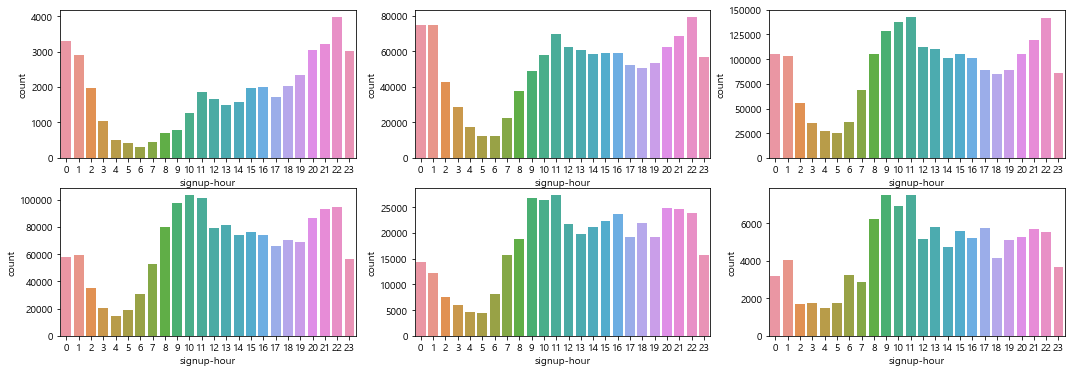

In [30]:
# 연령별 가입시간대 패턴
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,6)

sns.countplot(data=chai_ten, x="signup-hour", ax = ax1)
sns.countplot(data=chai_twenty, x="signup-hour", ax = ax2)
sns.countplot(data=chai_thirty, x="signup-hour", ax = ax3)
sns.countplot(data=chai_forty, x="signup-hour", ax = ax4)
sns.countplot(data=chai_fifty, x="signup-hour", ax = ax5)
sns.countplot(data=chai_old, x="signup-hour", ax = ax6)

<AxesSubplot:xlabel='created-hour', ylabel='count'>

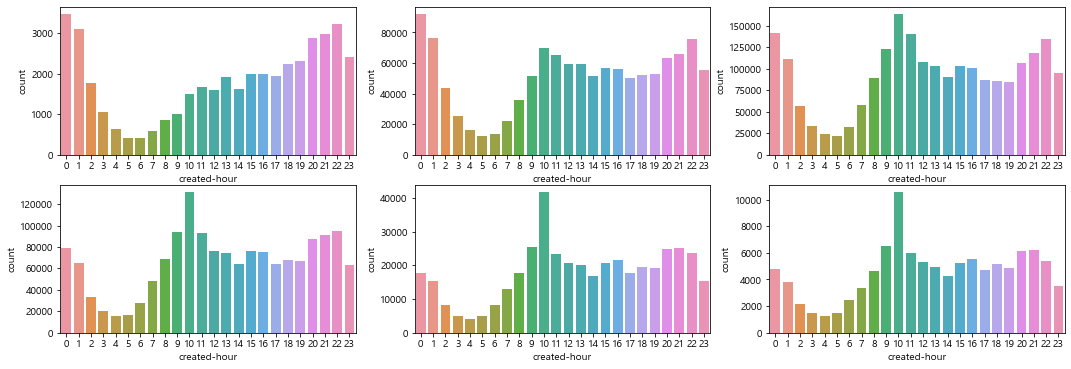

In [31]:
# 연령별 사용시간대 패턴
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,6)

sns.countplot(data=chai_ten, x="created-hour", ax = ax1)
sns.countplot(data=chai_twenty, x="created-hour", ax = ax2)
sns.countplot(data=chai_thirty, x="created-hour", ax = ax3)
sns.countplot(data=chai_forty, x="created-hour", ax = ax4)
sns.countplot(data=chai_fifty, x="created-hour", ax = ax5)
sns.countplot(data=chai_old, x="created-hour", ax = ax6)

> 가설 : 20대 초반과 후반의 결제패턴은 다르지 않을까?  

In [33]:
chai_twenty_early = chai[(chai['age'] >= 20) & (chai['age'] < 25)]
chai_twenty_late = chai[(chai['age'] >= 25) & (chai['age'] < 30)]

In [46]:
# 20대 초반 고객수
len(chai_twenty_early['customer_id'].unique())

55787

In [47]:
# 20대 후반 고객수
len(chai_twenty_late['customer_id'].unique())

95196

<AxesSubplot:xlabel='created-hour', ylabel='count'>

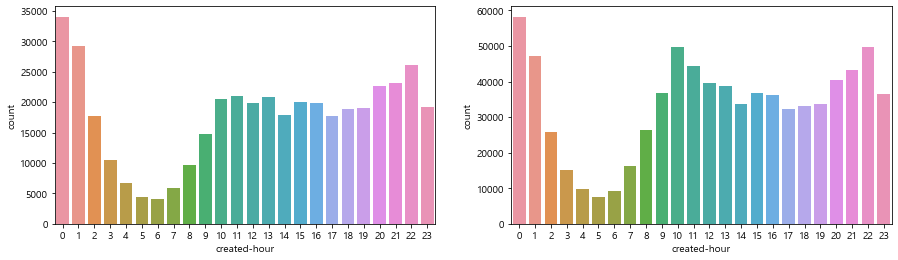

In [36]:
# 20대 초반과 후반의 결제시간대 
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(15,4)

sns.countplot(data=chai_twenty_early, x="created-hour", ax = ax1)
sns.countplot(data=chai_twenty_late, x="created-hour", ax = ax2)

- 20대 초반/후반 인당 결제금액 중앙값

In [20]:
# 20대 초반 고객의 인당 결제금액 중앙값 
chai_twenty_early.groupby('customer_id')['post_discount'].sum().median()

55800.0

In [21]:
# 20대 후반 고객의 인당 결제금액 중앙값
chai_twenty_late.groupby('customer_id')['post_discount'].sum().median()

57720.0

- 20대 초반/후반 성별에 따른 결제패턴 차이 : 취직 시기와 상관? 

In [24]:
chai_te_m = chai_twenty_early[chai_twenty_early['gender']=='male']
chai_te_f = chai_twenty_early[chai_twenty_early['gender']=='female']

In [44]:
chai_tl_m = chai_twenty_late[chai_twenty_late['gender']=='male']
chai_tl_f = chai_twenty_late[chai_twenty_late['gender']=='female']

In [26]:
# 20대 초반 남성의 인당 결제금액 중앙값
chai_te_m.groupby('customer_id')['post_discount'].sum().median()

54600.0

In [27]:
# 20대 초반 여성의 인당 결제금액 중앙값
chai_te_f.groupby('customer_id')['post_discount'].sum().median()

56800.0

In [31]:
# 20대 후반 남성의 인당 결제금액 중앙값
chai_tl_m.groupby('customer_id')['post_discount'].sum().median()

52700.0

In [33]:
# 20대 후반 여성의 인당 결제금액 중앙값
Chai_tl_f.groupby('customer_id')['post_discount'].sum().median()

60960.0

> 사용금액 분석

In [11]:
# chai페이 전체 사용금액
total_amount = chai['post_discount'].sum()
total_amount

106802665559

- 가설 : 앱 알람 허용여부에 따라 결제금액에 차이가 있을것이다
> 알람거부 세그먼트 결제금액합계가 더 큼. 알람 거부자 수가 많기 때문일수있음. 보다 자세히 뜯어볼 필요.

In [18]:
chai_twenty.groupby('push_permission')['post_discount'].sum()

push_permission
False    14831825875
True      9040607530
Name: post_discount, dtype: int64

- product별 사용금액 (가공된 값이 아닌가 싶음)

In [7]:
amount_by_product = chai.groupby('merchant_id')['post_discount'].sum()
amount_by_product

merchant_id
1      5948217545
2     11872086811
3     11965516853
4     11902724074
5     11849276972
6     11898923726
7     11917445562
8     11893576426
9     11839230944
10     5956323322
Name: post_discount, dtype: int64

- 월별 매출: 1월 매출 가장 높음. 보통 5,12월 매출이 높은데 1월 매출이 높은 이유는 무엇?  프로모션 무엇인지 확인 필요

In [20]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year)+month

In [13]:
amount_by_month = chai.set_index('created_at').groupby(extract_month)['post_discount'].sum()
amount_by_month

created_at
201908    10140004315
201909    11011597431
201910    16588333816
201911    13267905077
201912    15045601451
202001    18357805126
202002    11718702444
202003    10913372575
Name: post_discount, dtype: int64

<AxesSubplot:xlabel='created_at'>

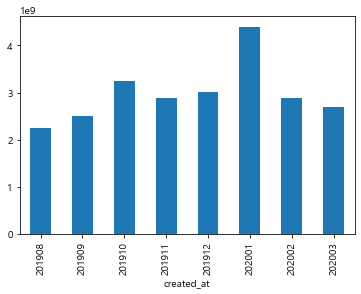

In [44]:
amount_by_month.plot(kind='bar',grid=False)

In [ ]:
# 일자별 매출

In [7]:
def extract_month_day(date):
    month = str(date.month)
    day = str(date.day)
    if date.month < 10:
        month = '0' + month
    if date.day < 10:
        day = '0' + day
    return str(date.year)+month+day

In [8]:
amount_by_month_day = chai.set_index('created_at').groupby(extract_month_day)['post_discount'].sum()
amount_by_month_day

created_at
20190801    495544744
20190802    306446705
20190803    209610795
20190804    249243967
20190805    436840205
              ...    
20200327    383513990
20200328    320072010
20200329    305677917
20200330    472264088
20200331    380008638
Name: post_discount, Length: 244, dtype: int64

In [21]:
amount_by_month_day.idxmax()

'20191021'

<AxesSubplot:xlabel='created_at'>

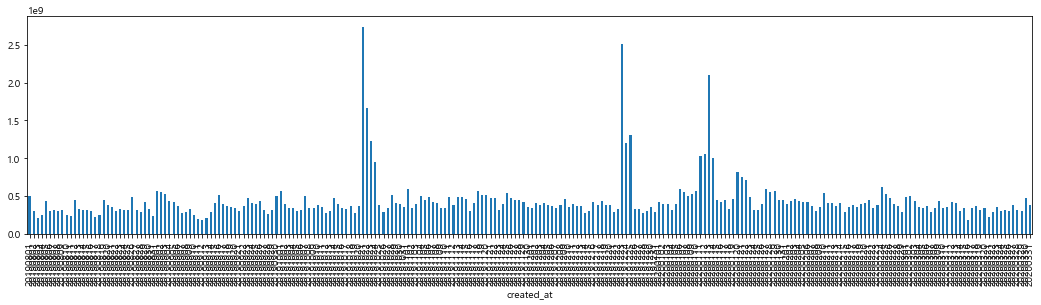

In [24]:
amount_by_month_day.plot(kind='bar',grid=False, figsize=(18,4))

<AxesSubplot:>

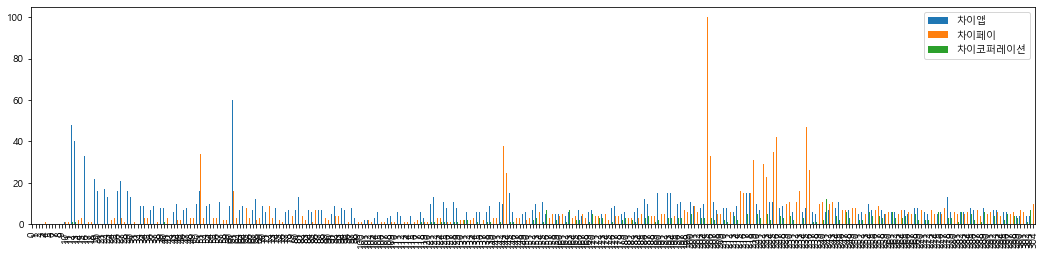

In [29]:
# 네이버데이터랩에서 차이검색량이 높았던 날짜와 매치하는지 알아보기위해 가져옴. 10월 검색량 높았지만 일자는 일치하지 않음. 
datalab.plot(kind='bar', grid=False, figsize=(18,4))

In [11]:
datalab = pd.read_csv('datalab.csv')
datalab

,날짜,차이앱,차이페이,차이코퍼레이션
0,2019-06-01,0,0,0
1,2019-06-02,0,0,0
2,2019-06-03,0,0,0
3,2019-06-04,0,0,0
4,2019-06-05,0,1,0
...,...,...,...,...
300,2020-03-27,4,7,3
301,2020-03-28,4,6,1
302,2020-03-29,4,7,1
303,2020-03-30,4,9,7


In [ ]:
# 요일별 페이사용량 : 월요일이 가장 많음 

In [15]:
amount_by_dow = chai.set_index('created_at').groupby(lambda date:date.dayofweek)['post_discount'].sum()
amount_by_dow

created_at
0    22730359291
1    17079666508
2    15599507027
3    14145399709
4    13308988336
5    11075092238
6    13104309126
Name: post_discount, dtype: int64

In [17]:
day_of_week = np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
amount_by_dow.index = day_of_week[amount_by_dow.index]

<AxesSubplot:>

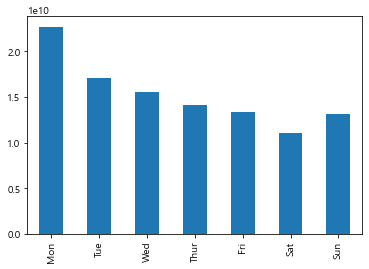

In [19]:
amount_by_dow.plot(kind='bar',grid=False)

In [21]:
# 시간대별 페이사용금액
amount_by_hour = chai.set_index('created_at').groupby(lambda date:date.hour)['post_discount'].sum()
amount_by_hour

created_at
0     6897807881
1     5146869886
2     2629100790
3     1562167447
4     1158203198
5     1070182572
6     1652389116
7     2978168935
8     4226750481
9     5451344521
10    7343554236
11    6287468668
12    5248490560
13    5027919991
14    4559546338
15    5004090211
16    5196265698
17    4606000181
18    4471094873
19    4465743917
20    5532501336
21    5873978696
22    6400347733
23    4253334970
Name: post_discount, dtype: int64

<AxesSubplot:xlabel='created_at'>

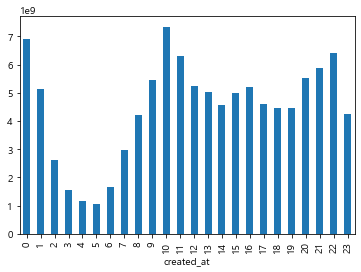

In [22]:
amount_by_hour.plot(kind='bar', grid=False)

In [21]:
# 20대의 시간대별 매출
# amount_by_hour_twenty = chai_twenty.set_index('created_at').groupby(lambda date:date.hour)['post_discount'].sum()
# amount_by_hour_twenty

created_at
0     1720705541
1     1377032577
2      776474397
3      458659592
4      299979173
5      226112638
6      268484110
7      436503611
8      685099940
9      951967192
10    1290536881
11    1277780597
12    1178222468
13    1179290002
14    1078053355
15    1169998243
16    1150541448
17    1078794276
18    1074069631
19    1062943399
20    1257198318
21    1320943425
22    1499283493
23    1053759098
Name: post_discount, dtype: int64

In [25]:
# 20대의 시간대별 매출
amount_by_hour_twenty = chai_twenty.groupby('created-hour')['post_discount'].count()
amount_by_hour_twenty

created-hour
0     1720705541
1     1377032577
2      776474397
3      458659592
4      299979173
5      226112638
6      268484110
7      436503611
8      685099940
9      951967192
10    1290536881
11    1277780597
12    1178222468
13    1179290002
14    1078053355
15    1169998243
16    1150541448
17    1078794276
18    1074069631
19    1062943399
20    1257198318
21    1320943425
22    1499283493
23    1053759098
Name: post_discount, dtype: int64

In [30]:
# 30대의 시간대별 매출
amount_by_hour_thirty = chai_thirty.groupby('created-hour')['post_discount'].sum()
amount_by_hour_thirty

created-hour
0     2921713193
1     2142188018
2     1044140688
3      614841030
4      453005112
5      426395680
6      667640476
7     1271904262
8     1790693655
9     2271245957
10    2977646370
11    2650277663
12    2107643034
13    1976820463
14    1783646370
15    1959303067
16    2068525793
17    1776531213
18    1686041920
19    1646133894
20    2071760243
21    2259693387
22    2571508082
23    1697197831
Name: post_discount, dtype: int64

In [49]:
# 40대의 시간대별 매출
amount_by_hour_forty = chai_forty.groupby('created-hour')['post_discount'].sum()
amount_by_hour_forty

created-hour
0     1640015655
1     1226360346
2      607182671
3      362559005
4      285365413
5      304323621
6      519952914
7      950048187
8     1310512959
9     1683490713
10    2228212135
11    1778678764
12    1455173585
13    1379922661
14    1261159545
15    1365959959
16    1447764741
17    1273348074
18    1241867427
19    1279566370
20    1613575937
21    1682070392
22    1743739307
23    1141720241
Name: post_discount, dtype: int64

> 매출이 가장 큰 1월 결제 분석 : 결제건수도 1월 가장 많음

In [37]:
# 월별 결제 건수
jan = chai.groupby('created-month')['created_at'].count()
jan

created-month
1     938568
2     710419
3     616408
8     695393
9     601036
10    679559
11    724012
12    658415
Name: created_at, dtype: int64

<AxesSubplot:xlabel='created-month'>

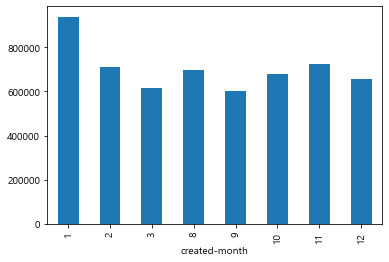

In [38]:
jan.plot(kind='bar', grid=False)

In [39]:
# 월별 프로모션 금액
promotion = chai.groupby('created-month')['total_promotion'].sum()
promotion

created-month
1     1249449283
2      788175646
3      491610817
8     1593204763
9     1076203773
10    1308505904
11    1337060040
12     839224689
Name: total_promotion, dtype: int64

- 프로모션 금액지출은 1월보다 8월이 더 큼

<AxesSubplot:xlabel='created-month'>

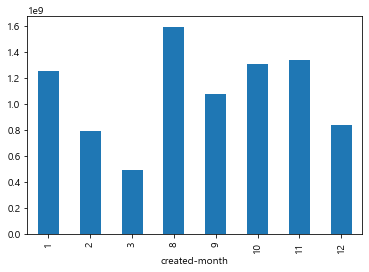

In [40]:
promotion.plot(kind='bar', grid=False)

> 8월과 1월의 ROAS 비교(프로모션비용을 홍보비용으로 산정) 

In [43]:
august = chai[chai['created-month']== 8]
august

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,created-hour,created-minute,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour
4146,536616,2019-08-12 02:11:55.432,990,990,0,0,0,True,female,False,...,2,11,1996,2,5,24,2019,8,2,17
4151,377529,2019-08-11 23:10:47.929,11250,10000,0,1250,1250,False,male,False,...,23,10,1984,12,13,36,2019,7,10,10
4155,244212,2019-08-17 17:17:48.867,17640,15680,0,1960,1960,False,female,False,...,17,17,1983,5,7,37,2019,8,2,22
4159,366457,2019-08-26 11:34:07.501,14500,11500,0,3000,3000,True,male,False,...,11,34,1956,1,16,64,2019,6,14,13
4165,301141,2019-08-11 21:47:03.973,18055,16055,0,2000,2000,True,female,False,...,21,47,1984,1,24,36,2019,6,26,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623785,343621,2019-08-17 17:39:42.667,7020,6240,0,780,780,False,female,False,...,17,39,1983,7,7,37,2019,6,15,1
5623786,30777,2019-08-19 21:54:50.497,12480,6480,0,6000,6000,False,female,False,...,21,54,1981,9,8,39,2019,8,8,23
5623787,245229,2019-08-12 15:00:37.629,28800,22800,0,6000,6000,True,female,False,...,15,0,1989,1,17,31,2019,8,12,15
5623793,95610,2019-08-16 13:22:34.398,16200,14400,0,1800,1800,False,female,False,...,13,22,1984,6,30,36,2019,8,16,13


In [44]:
august['post_discount'].sum() 

10140004315

In [45]:
august['total_promotion'].sum()

1593204763

In [46]:
# 8월 ROAS : 광고를 통해 발생한 수익 / 광고비용
august['post_discount'].sum() / august['total_promotion'].sum()

6.364533015772813

In [47]:
jan = chai[chai['created-month'] == 1]
jan

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,created-hour,created-minute,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour
6,31330,2020-01-07 21:03:33.007,32100,31100,1605,1000,2605,True,female,False,...,21,3,1974,2,16,46,2019,6,19,10
9,168043,2020-01-21 20:02:59.730,26750,25750,1337,1000,2337,True,male,False,...,20,2,1977,3,21,43,2019,11,18,17
14,309564,2020-01-20 05:54:34.147,3720,3720,186,0,186,True,female,False,...,5,54,1978,1,11,42,2019,7,26,16
15,47489,2020-01-25 08:05:22.665,9890,9890,494,0,494,False,female,False,...,8,5,1988,10,7,32,2019,10,24,18
29,229733,2020-01-25 09:35:00.042,24280,23280,1214,1000,2214,True,female,False,...,9,35,1980,2,19,40,2019,11,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623794,278855,2020-01-12 11:53:14.906,860,860,0,0,0,True,male,False,...,11,53,1984,1,2,36,2019,11,23,14
5623795,95339,2020-01-17 22:32:50.242,6900,6900,0,0,0,True,female,False,...,22,32,1990,3,2,30,2019,7,31,21
5623801,303304,2020-01-31 22:56:06.193,10800,9800,0,1000,1000,True,female,False,...,22,56,1986,7,11,34,2019,9,19,1
5623803,272949,2020-01-14 10:00:48.964,11900,10900,0,1000,1000,False,female,False,...,10,0,1984,6,3,36,2019,6,17,11


In [48]:
# 1월 ROAS : 광고를 통해 발생한 수익 / 광고비용 
jan['post_discount'].sum() / jan['total_promotion'].sum()

14.69271732416529

> 개인화된 push_notification 
- 머신러닝과 데이터분석 a-z 올인원패키지 강의에서 가져옴

In [38]:
# 각 개인별 created 시간대와 created 건수
order_count_by_hour = chai.set_index('created_at').groupby(['customer_id',lambda date:date.hour])['post_discount'].count()
order_count_by_hour

customer_id  created_at
1            10            1
             18            1
2            17            1
             20            1
3            16            1
                          ..
544921       18            1
             19            1
             21            1
             22            1
             23            1
Name: post_discount, Length: 2716958, dtype: int64

In [39]:
# 544921 번의 경우 오후 2시 주문건수가 가장 많기때문에 이 시간이 푸시하기 가장 좋은 시간
order_count_by_hour.loc[544921]

created_at
9     1
13    1
14    3
18    1
19    1
21    1
22    1
23    1
Name: post_discount, dtype: int64

In [ ]:
# 사용자별 최대 주문시간 계산하기

In [42]:
# 가장 많은 주문량을 보인 시간을 인덱스로 뽑기 
idx = order_count_by_hour.groupby('customer_id').idxmax()
idx

customer_id
1              (1, 10)
2              (2, 17)
3              (3, 16)
4              (4, 21)
5              (5, 12)
              ...     
544917     (544917, 1)
544918     (544918, 1)
544919    (544919, 10)
544920     (544920, 8)
544921    (544921, 14)
Name: post_discount, Length: 544921, dtype: object

In [ ]:
# 해당시간 인덱싱 - 사용자별로 어떤시간에 최대 구매건수를 보이는지 뽑음

In [87]:
# 사용자별로 어떤 시간대에 최대의 구매건수가 일어났는지 
result = order_count_by_hour.loc[idx]
result

customer_id  created_at
1            10             1
2            17             1
3            16             1
4            21             2
5            12             2
                           ..
544917       1              2
544918       1              4
544919       10            23
544920       8              1
544921       14             3
Name: post_discount, Length: 544921, dtype: int64

In [ ]:
result.reset_index()

In [ ]:
# 시간대별로 주문을 많이한 사용자들에게 for문을 돌려
# 앱 푸시를 개인화 해서 보내고 앱 사용확률을 높일 수 있다. 

result.reset_index().groupby('created_at').groups

> 헤비유저 특징 분석

In [ ]:
# 우수고객 확인

In [21]:
# created_at 건수기준 우수고객
count_created = pd.pivot_table(chai, index='customer_id',values='created_at',aggfunc='count')
count_created.sort_values(by='created_at',ascending=False)

,created_at
customer_id,
45419,2705
445691,2630
485910,1684
400418,1363
96306,1229
...,...
433286,1
101310,1
365346,1


In [22]:
count_created['created_at'].quantile(q=0.8, interpolation='nearest')

13

In [33]:
# 카운트된 created_at 컬럼을 count_created 컬럼으로 변경
count_created = count_created.rename(columns={'created_at':'count_created'})
count_created

,count_created
customer_id,
1,2
2,2
3,1
4,8
5,6
...,...
544917,2
544918,21
544919,43


In [34]:
# 테이블 합치기 
chai = pd.merge(chai,count_created, how='right', left_on='customer_id', right_on='customer_id')
chai.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,created-year,created-month,created-day,created-hour,created-minute,count_created
0,1,2019-08-27 10:46:45.237,14220,12640,0,1580,1580,False,female,False,1986-03-26,2019-08-25 18:28:34.815,2,2019,8,27,10,46,2
1,1,2019-08-25 18:41:15.118,10110,6320,0,3790,3790,False,female,False,1986-03-26,2019-08-25 18:28:34.815,6,2019,8,25,18,41,2
2,2,2019-10-15 20:18:39.041,11500,9999,0,1501,1501,False,female,False,1995-07-03,2019-08-09 17:16:59.757,7,2019,10,15,20,18,2
3,2,2019-08-09 17:19:03.797,13530,9360,0,4170,4170,False,female,False,1995-07-03,2019-08-09 17:16:59.757,9,2019,8,9,17,19,2
4,3,2019-08-24 16:40:55.260,18120,13440,0,4680,4680,True,male,False,1981-09-09,2019-08-24 16:43:13.693,4,2019,8,24,16,40,1


In [35]:
# created 건수 vip 고객(상위20%) 컬럼 생성
chai.loc[chai['count_created'] >=13, 'createdcount_vip'] = 'vip'
chai.loc[(chai['count_created'] < 13) & (chai['count_created'] >= 2), 'createdcount_vip'] = 'general'
chai.loc[chai['count_created'] < 2, 'createdcount_vip'] = 'one'

In [79]:
chai['createdcount_vip'].value_counts()

vip        4167788
general    1292795
one         163227
Name: createdcount_vip, dtype: int64

In [81]:
고객중 상위 20% 사람들이  전체결제 건수의 74%를 일으킴.  
4167788/(4167788+1292795+163227) 

0.7410968720493758

> post_discount 금액기준 우수고객 (상위20%)

In [8]:
# post_discount 금액기준 우수고객
cpd = pd.pivot_table(chai, index='customer_id',values='post_discount',aggfunc='sum')
cpd.sort_values(by='post_discount',ascending=False)

,post_discount
customer_id,
377381,112273800
94844,108395600
38481,75176900
335736,64744230
52710,37914217
...,...
451115,0
272228,0
314451,0


In [9]:
# 카운트된  컬럼을 sum_discount 컬럼으로 변경
cpd = cpd.rename(columns={'post_discount':'sum_discount'})
cpd

,sum_discount
customer_id,
1,18960
2,19359
3,13440
4,216980
5,55170
...,...
544917,34740
544918,252665
544919,483123


In [10]:
# 테이블 합쳐 컬럼추가 
chai = pd.merge(chai,cpd, how='right', left_on='customer_id', right_on='customer_id')
chai.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,created-minute,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour,sum_discount
0,1,2019-08-27 10:46:45.237,14220,12640,0,1580,1580,False,female,False,...,46,1986,3,26,34,2019,8,25,18,18960
1,1,2019-08-25 18:41:15.118,10110,6320,0,3790,3790,False,female,False,...,41,1986,3,26,34,2019,8,25,18,18960
2,2,2019-10-15 20:18:39.041,11500,9999,0,1501,1501,False,female,False,...,18,1995,7,3,25,2019,8,9,17,19359
3,2,2019-08-09 17:19:03.797,13530,9360,0,4170,4170,False,female,False,...,19,1995,7,3,25,2019,8,9,17,19359
4,3,2019-08-24 16:40:55.260,18120,13440,0,4680,4680,True,male,False,...,40,1981,9,9,39,2019,8,24,16,13440


In [26]:
chai['sum_discount'].quantile(q=0.8, interpolation='nearest')

1203185

> 상위 20% 분석

In [56]:
chai.groupby('customer_id')['post_discount'].sum()

customer_id
1          18960
2          19359
3          13440
4         216980
5          55170
           ...  
544917     34740
544918    252665
544919    483123
544920    429100
544921    214464
Name: post_discount, Length: 541018, dtype: int64

In [11]:
# 인당 결제 상위 20% 금액
chai['sum_discount'].quantile(q=0.8, interpolation='nearest')

1203185

In [24]:
# 인당결제금액이 상위 20%를 넘는 경우 vip
vip = chai[chai['sum_discount'] >= 1203185] 
vip.tail()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour,sum_discount,discount_ratio
5614535,544881,2020-02-21 13:01:34.570,21840,21840,655,0,655,True,female,False,...,1970,3,27,50,2019,6,17,8,1461848,0.00
5614536,544881,2019-09-22 01:10:28.598,4410,3920,0,490,490,True,female,False,...,1970,3,27,50,2019,6,17,8,1461848,11.00
5614537,544881,2020-03-17 18:00:12.023,5700,5700,0,0,0,True,female,False,...,1970,3,27,50,2019,6,17,8,1461848,0.00
5614538,544881,2019-11-26 07:14:09.313,11800,11800,0,0,0,True,female,False,...,1970,3,27,50,2019,6,17,8,1461848,0.00
5614539,544881,2019-09-16 07:21:16.127,9810,8720,0,1090,1090,True,female,False,...,1970,3,27,50,2019,6,17,8,1461848,11.00


In [25]:
general = chai[chai['sum_discount'] < 1203185] 
general.tail()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour,sum_discount,discount_ratio
5614886,544921,2019-11-17 23:03:23.821,9945,8840,0,1105,1105,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,11.00
5614887,544921,2019-11-18 14:05:09.043,17478,15536,0,1942,1942,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,11.00
5614888,544921,2019-12-28 14:14:43.166,13900,13900,0,0,0,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,0.00
5614889,544921,2019-11-17 22:15:19.415,11259,10008,0,1251,1251,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,11.00
5614890,544921,2019-12-05 18:05:12.585,12900,11900,0,1000,1000,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,8.00


In [38]:
vip_age = vip.groupby('age')['post_discount'].sum() 

<AxesSubplot:xlabel='age'>

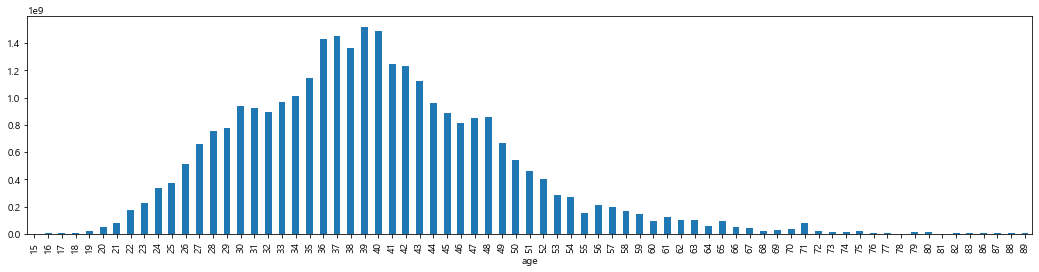

In [40]:
# 상위 20%의 나이별 결제금액합계 분포
# 35세부터 44세까지 구간이 가장 많음 

vip_age.plot(kind='bar', grid=False, figsize=(18,4))


In [50]:
# vip의 캐시백 이용금액대비 할인금액 비율
vip['cashback_amount'].sum() / vip['discount_amount'].sum()

0.1282974686862284

In [51]:
# 전체고객의 캐시백 이용금액대비 할인금액 비율
chai['cashback_amount'].sum() / chai['discount_amount'].sum()

0.08658458905941528

In [20]:
# 할인율
chai['discount_ratio'] = round(((chai['pre_discount']-chai['post_discount']) / chai['pre_discount'])*100,0)

In [21]:
chai.tail()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,birth-year,birth-month,birth-day,age,signup-year,signup-month,signup-day,signup-hour,sum_discount,discount_ratio
5614886,544921,2019-11-17 23:03:23.821,9945,8840,0,1105,1105,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,11.00
5614887,544921,2019-11-18 14:05:09.043,17478,15536,0,1942,1942,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,11.00
5614888,544921,2019-12-28 14:14:43.166,13900,13900,0,0,0,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,0.00
5614889,544921,2019-11-17 22:15:19.415,11259,10008,0,1251,1251,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,11.00
5614890,544921,2019-12-05 18:05:12.585,12900,11900,0,1000,1000,False,male,False,...,1986,12,25,34,2019,11,14,11,214464,8.00


C:\Users\a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='discount_ratio', ylabel='Density'>

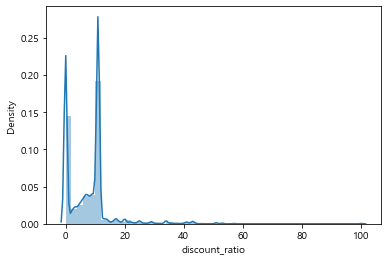

In [71]:
sns.distplot(vip['discount_ratio'])

C:\Users\a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='discount_ratio', ylabel='Density'>

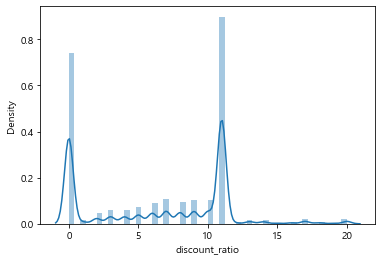

In [73]:
low_ratio = vip[vip['discount_ratio'] <= 20]
sns.distplot(low_ratio['discount_ratio'])

> 코호트 분석 

In [10]:
def get_month_as_datetime(date):
    return datetime(date.year,date.month,1)


chai['month'] = chai['created_at'].apply(get_month_as_datetime)

chai.head()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,merchant_id,created-year,created-month,created-day,created-hour,birth-year,birth-month,birth-day,age,month
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,...,9,2020,3,22,10,1957,11,5,63,2020-03-01
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,...,6,2020,3,12,9,1983,10,23,37,2020-03-01
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,...,9,2020,2,1,8,1975,7,6,45,2020-02-01
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,...,4,2020,3,6,10,1996,8,21,24,2020-03-01
4,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,...,5,2020,3,13,12,1999,1,23,21,2020-03-01


In [ ]:
# 사용자가 최초 created_at 한 월을 표시

In [11]:
month_group = chai.groupby('customer_id')['month']
chai['monthstarted'] = month_group.transform(np.min)

chai.tail()

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,...,created-year,created-month,created-day,created-hour,birth-year,birth-month,birth-day,age,month,monthstarted
5623805,434398,2019-12-12 07:48:51.491,7547,7547,0,0,0,True,female,False,...,2019,12,12,7,1975,2,6,45,2019-12-01,2019-08-01
5623806,481515,2019-12-20 07:37:15.259,22900,20900,0,2000,2000,True,female,False,...,2019,12,20,7,1989,1,23,31,2019-12-01,2019-08-01
5623807,298192,2020-01-05 01:55:28.331,19790,18790,0,1000,1000,True,female,False,...,2020,1,5,1,1985,4,6,35,2020-01-01,2019-09-01
5623808,430962,2019-10-01 03:32:17.435,15921,14152,0,1769,1769,False,male,False,...,2019,10,1,3,1983,7,25,37,2019-10-01,2019-08-01
5623809,246136,2019-11-07 11:33:34.230,6750,6000,0,750,750,True,female,False,...,2019,11,7,11,1987,8,20,33,2019-11-01,2019-09-01


In [ ]:
# 최초 구매월로부터 몇개월이 지났는지 계산하기

In [60]:
chai['monthpassed'] = (chai['month'].dt.year - chai['monthstarted'].dt.year)*12 + (chai['month'].dt.month - chai['monthstarted'].dt.month)

In [75]:
chai['monthpassed'].value_counts()

0    1403516
1     933698
2     827921
3     704900
5     561928
4     537623
6     375196
7     279028
Name: monthpassed, dtype: int64

#### 기준월 monthpassed를 기준으로 고객 카운팅
 > 기준이 되는 월과 그 월로부터 지난 기간의 고객 수를 계산

In [67]:
def get_unique_no(x):
    return len(np.unique(x))

cohort_group = chai.groupby(['monthstarted','monthpassed'])
cohort_df = cohort_group['customer_id'].apply(get_unique_no).reset_index()
cohort_df.head()

,monthstarted,monthpassed,customer_id
0,2019-08-01,0,196064
1,2019-08-01,1,101998
2,2019-08-01,2,97411
3,2019-08-01,3,95789
4,2019-08-01,4,85824


#### 테이블 피벗
> 피벗함수를 이용해 index는 monthstarted, columns을 monthpassed로 변경해 테이블 변경
>> 첫번째 column을 기준으로 100분위 연산

In [68]:
cohort_df = cohort_df.pivot(index='monthstarted',columns='monthpassed')
cohort_df.head()

customer_id                                                \
monthpassed            0         1        2        3        4        5   
monthstarted                                                             
2019-08-01      196064.0  101998.0  97411.0  95789.0  85824.0  93696.0   
2019-09-01       54728.0   25612.0  23315.0  20487.0  22151.0  19936.0   
2019-10-01       48211.0   20056.0  17067.0  18366.0  16177.0  13323.0   
2019-11-01       45404.0   18296.0  19085.0  16610.0  13365.0      NaN   
2019-12-01       54914.0   25139.0  21576.0  17053.0      NaN      NaN   

                                
monthpassed         6        7  
monthstarted                    
2019-08-01    83601.0  71082.0  
2019-09-01    16766.0      NaN  
2019-10-01        NaN      NaN  
2019-11-01        NaN      NaN  
2019-12-01        NaN      NaN

In [73]:
customer_cohort = cohort_df.div(cohort_df.iloc[:,0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)
customer_cohort

customer_id                                                 
monthpassed            0      1      2      3      4      5      6      7
monthstarted                                                             
2019-08-01         100.0  52.02  49.68  48.86  43.77  47.79  42.64  36.25
2019-09-01         100.0  46.80  42.60  37.43  40.47  36.43  30.64    NaN
2019-10-01         100.0  41.60  35.40  38.10  33.55  27.63    NaN    NaN
2019-11-01         100.0  40.30  42.03  36.58  29.44    NaN    NaN    NaN
2019-12-01         100.0  45.78  39.29  31.05    NaN    NaN    NaN    NaN
2020-01-01         100.0  38.84  28.67    NaN    NaN    NaN    NaN    NaN
2020-02-01         100.0  31.88    NaN    NaN    NaN    NaN    NaN    NaN
2020-03-01         100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN

In [ ]:
# heatmap 출력하기

<AxesSubplot:xlabel='None-monthpassed', ylabel='monthstarted'>

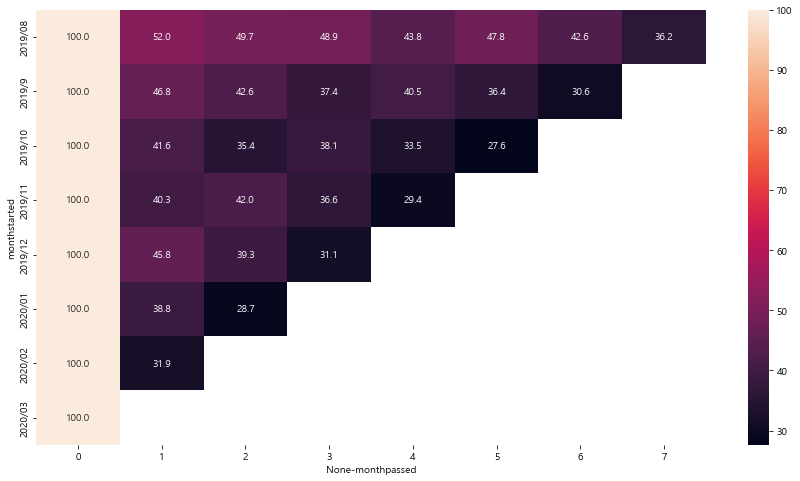

In [76]:
xticks = np.arange(0,8)
yticks = ['2019/08','2019/9','2019/10','2019/11','2019/12','2020/01','2020/02','2020/03']

plt.figure(figsize= (15,8))
sns.heatmap(customer_cohort,
           annot=True,
           xticklabels=xticks,
           yticklabels=yticks,
           fmt='.1f')

In [ ]:
# 에러 코드 : 왜 에러가 났는지 나중에 다시 해볼것 

In [ ]:
best_review = naver_total.groupby('product_rename')['review_cnt'].sum().sort_values(ascending=False).head(10)
best_review

plt.figure(figsize=(8,4))
best_review.plot(kind='barh',grid=True, title='bb')

In [ ]:
for customer_id,customer_ids,count_created in zip(chai['customer_id'],count_created['customer_ids'],count_created['count_created']):
        
    if count_created >= 10:
        chai.loc[chai['customer_id']== count_created['customer_ids'],'created_count_vip'] = 'vip'
    elif count_created < 10:
        chai.loc[chai['customer_id']== count_created['customer_ids'],'created_count_vip'] = 'general customer'
